⚖️ Welcome to the Moral Machine Simulator
Do you want to generate a random scenario? (yes/no): no

How many passengers? 1

Enter details for a passenger:
Categories: child, adult, elderly, doctor, athlete, dog, cat
Category: child
Gender (male/female): male
Is criminal? (yes/no): no

How many pedestrians? 1

Enter details for a pedestrian:
Categories: child, adult, elderly, doctor, athlete, dog, cat
Category: dog
Is there a barricade in front of pedestrians? (yes/no): yes

🚗 Passengers:
  - child male
🚶 Pedestrians:
  - dog
🚧 Barricade Present: Yes

Score — Passengers: 3, Pedestrians: -4


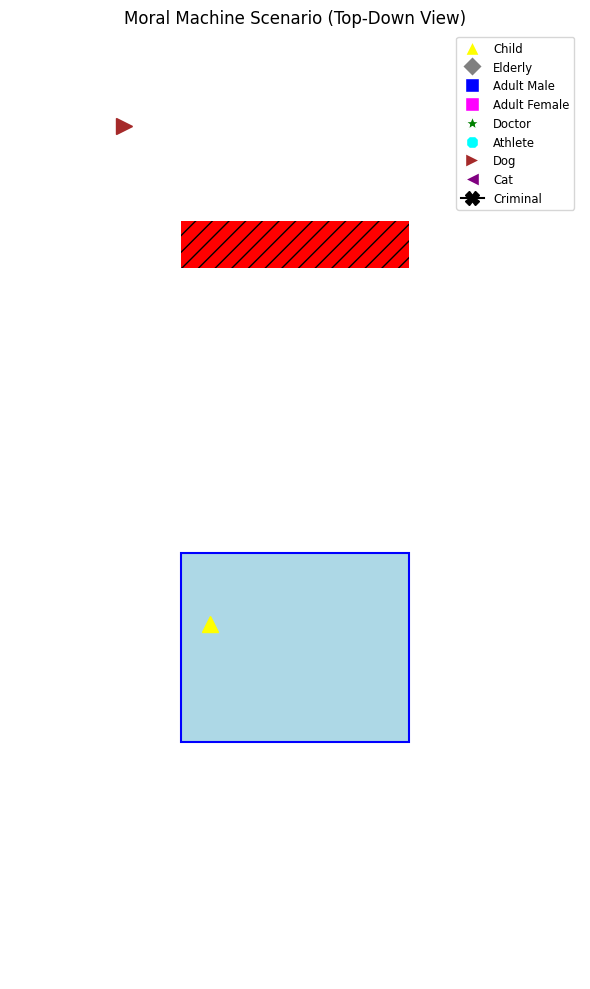


🚦 Ethical Decision: STAY (Car will stay)


In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import random

# Class representing an individual in the scenario
class Person:
    def __init__(self, role, category, gender=None, is_pregnant=False, is_criminal=False):
        self.role = role
        self.category = category
        self.gender = gender
        self.is_pregnant = is_pregnant
        self.is_criminal = is_criminal

    def __repr__(self):
        details = [self.category]
        if self.gender:
            details.append(self.gender)
        if self.is_pregnant:
            details.append("pregnant")
        if self.is_criminal:
            details.append("criminal")
        return " ".join(details)

# Class representing the overall scenario
class Scenario:
    def __init__(self, passengers, pedestrians, has_barricade):
        self.passengers = passengers
        self.pedestrians = pedestrians
        self.has_barricade = has_barricade

# Helper function for yes/no input validation
def get_yes_no(prompt):
    while True:
        response = input(prompt).strip().lower()
        if response in ['yes', 'no']:
            return response == 'yes'
        print("❌ Please enter 'yes' or 'no'.")

# Function for manual person entry
def input_person(role):
    print(f"\nEnter details for a {role}:")
    valid_categories = ['child', 'adult', 'elderly', 'doctor', 'athlete', 'dog', 'cat']
    print("Categories:", ", ".join(valid_categories))

    while True:
        category = input("Category: ").strip().lower()
        if category in valid_categories:
            break
        print("❌ Invalid category. Please enter a valid category.")

    gender = None
    is_pregnant = False
    is_criminal = False

    if category in ['child', 'adult', 'elderly', 'doctor', 'athlete']:
        while True:
            gender = input("Gender (male/female): ").strip().lower()
            if gender in ['male', 'female']:
                break
            print("❌ Invalid gender. Please enter 'male' or 'female'.")

        if category != 'child' and gender == 'female':
            is_pregnant = get_yes_no("Is pregnant? (yes/no): ")
        is_criminal = get_yes_no("Is criminal? (yes/no): ")

    return Person(role, category, gender, is_pregnant, is_criminal)

# Function to create a random person
def random_person(role):
    categories = ['child', 'adult', 'elderly', 'doctor', 'athlete', 'dog', 'cat']
    category = random.choice(categories)
    gender = random.choice(['male', 'female']) if category not in ['dog', 'cat'] else None
    is_pregnant = gender == 'female' and category != 'child' and random.choice([True, False])
    is_criminal = category not in ['dog', 'cat'] and random.choice([True, False])
    return Person(role, category, gender, is_pregnant, is_criminal)

# Function to create a group (manual or random)
def get_group(role, method='random'):
    group = []
    if method == 'random':
        count = random.randint(2, 5)
        for _ in range(count):
            group.append(random_person(role))
    else:
        while True:
            try:
                count = int(input(f"\nHow many {role}s? "))
                if count < 1:
                    print("❌ Number must be at least 1. Please try again.")
                    continue
                break
            except ValueError:
                print("❌ Invalid input. Please enter a valid integer.")
        for _ in range(count):
            group.append(input_person(role))
    return group

# Display the details of the scenario
def display_scenario(scenario):
    print("\n🚗 Passengers:")
    for p in scenario.passengers:
        print(f"  - {p}")
    print("🚶 Pedestrians:")
    for p in scenario.pedestrians:
        print(f"  - {p}")
    print(f"🚧 Barricade Present: {'Yes' if scenario.has_barricade else 'No'}")

# Decide action based on scoring
def decide(scenario: Scenario) -> str:
    def score(group, is_pedestrian):
        score = 0
        for p in group:
            values = {'child': 3, 'elderly': 1, 'adult': 2, 'doctor': 4, 'athlete': 3, 'dog': 1, 'cat': 1}
            score += values.get(p.category, 0)
            if p.is_criminal:
                score -= 2
            if p.is_pregnant:
                score += 2
        if is_pedestrian and scenario.has_barricade:
            score -= 5
        return score

    ps = score(scenario.passengers, False)
    pd = score(scenario.pedestrians, True)
    print(f"\nScore — Passengers: {ps}, Pedestrians: {pd}")
    return "swerve" if pd > ps else "stay"

# Function to plot a single person marker
def add_person_marker(ax, x, y, person):
    category = person.category
    color = 'black'
    marker = 'o'

    if category == 'child':
        marker, color = '^', 'yellow'
    elif category == 'elderly':
        marker, color = 'D', 'gray'
    elif category == 'adult':
        marker, color = 's', 'blue' if person.gender == 'male' else 'magenta'
    elif category == 'doctor':
        marker, color = '*', 'green'
    elif category == 'athlete':
        marker, color = '8', 'cyan'
    elif category == 'dog':
        marker, color = '>', 'brown'
    elif category == 'cat':
        marker, color = '<', 'purple'
    if person.is_criminal:
        marker, color = 'X', 'black'

    ax.plot(x, y, marker=marker, color=color, markersize=12)

# Full scenario visualization
def plot_scenario(passengers, pedestrians, has_barricade):
    fig, ax = plt.subplots(figsize=(6, 10))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 20)
    ax.set_facecolor('gray')
    ax.set_title("Moral Machine Scenario (Top-Down View)")

    if has_barricade:
        ax.add_patch(patches.Rectangle((3, 15), 4, 1, facecolor='red', hatch='//'))

    for i, person in enumerate(pedestrians):
        x = 2 + i % 5
        y = 18 - (i // 5)
        add_person_marker(ax, x, y, person)

    car_zone = patches.Rectangle((3, 5), 4, 4, linewidth=1.5, edgecolor='blue', facecolor='lightblue')
    ax.add_patch(car_zone)

    for i, person in enumerate(passengers):
        x = 3.5 + (i % 3)
        y = 7.5 - (i // 3)
        add_person_marker(ax, x, y, person)

    legend_elements = [
        Line2D([0], [0], marker='^', color='w', label='Child', markerfacecolor='yellow', markersize=10),
        Line2D([0], [0], marker='D', color='w', label='Elderly', markerfacecolor='gray', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Adult Male', markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Adult Female', markerfacecolor='magenta', markersize=10),
        Line2D([0], [0], marker='*', color='w', label='Doctor', markerfacecolor='green', markersize=10),
        Line2D([0], [0], marker='8', color='w', label='Athlete', markerfacecolor='cyan', markersize=10),
        Line2D([0], [0], marker='>', color='w', label='Dog', markerfacecolor='brown', markersize=10),
        Line2D([0], [0], marker='<', color='w', label='Cat', markerfacecolor='purple', markersize=10),
        Line2D([0], [0], marker='X', color='black', label='Criminal', markerfacecolor='black', markersize=10),
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize='small')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# ======================= MAIN ===========================
print("⚖️ Welcome to the Moral Machine Simulator")
mode = input("Do you want to generate a random scenario? (yes/no): ").strip().lower()
method = 'random' if mode == 'yes' else 'manual'

passengers = get_group("passenger", method)
pedestrians = get_group("pedestrian", method)
has_barricade = random.choice([True, False]) if method == 'random' else get_yes_no("Is there a barricade in front of pedestrians? (yes/no): ")

scenario = Scenario(passengers, pedestrians, has_barricade)
display_scenario(scenario)
decision = decide(scenario)
plot_scenario(passengers, pedestrians, has_barricade)

print(f"\n🚦 Ethical Decision: {decision.upper()} (Car will {decision})")
